# Clustering Analysis of Marine Training Customer (Banten Merchant Marine Polytechnic Cadet and Alumnus) Profiles Using Age, Recency, Frequency, and Monetary Method with K-Means Algorithms from Scratch

### Project Overview

This study aims to analyze marine training customer (Banten Merchant Marine Polytechnic cadet and alumnus) profiles using age, recency, frequency, and monetary methods for data categorization and clustering using the K-means algorithm from scratch.

### Import Libraries

In [1]:
# Utilities
import pandas as pd
from typing import List, Tuple
from datetime import date, datetime

# Math & Statistics
from scipy import stats
from sklearn.preprocessing import StandardScaler
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Seaborn
import seaborn as sns

# Plotly
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg" # static plotly

### Data Inputs

In [2]:
data = pd.read_excel('./customer_profiles.xlsx') # import dataset
data.head() # overview

,NRT/Kode Pelaut,Tanggal Lahir,Nama,Tanggal Transaksi,Diklat,Nominal Transaksi
0,62002624189,2004-11-27,EKO HARI PURWANTO,2023-02-06,CMHBT,785000
1,62002624189,2004-11-27,EKO HARI PURWANTO,2023-04-10,SSO,835000
2,62002624189,2004-11-27,EKO HARI PURWANTO,2022-07-29,ATOTCO,985000
3,62002624189,2004-11-27,EKO HARI PURWANTO,2023-03-28,BST,1335000
4,62002624189,2004-11-27,EKO HARI PURWANTO,2022-06-15,RS / RADAR SIMULATOR,985000


In [3]:
data.head()

,NRT/Kode Pelaut,Tanggal Lahir,Nama,Tanggal Transaksi,Diklat,Nominal Transaksi
0,62002624189,2004-11-27,EKO HARI PURWANTO,2023-02-06,CMHBT,785000
1,62002624189,2004-11-27,EKO HARI PURWANTO,2023-04-10,SSO,835000
2,62002624189,2004-11-27,EKO HARI PURWANTO,2022-07-29,ATOTCO,985000
3,62002624189,2004-11-27,EKO HARI PURWANTO,2023-03-28,BST,1335000
4,62002624189,2004-11-27,EKO HARI PURWANTO,2022-06-15,RS / RADAR SIMULATOR,985000


This table contains several columns with different pieces of information related to customers or individuals. Here's an explanation of each column:

* NRT/Kode Pelaut: This column contains the customer's NRT (National Registration and Accreditation Scheme) or sailor code, which appears to be a unique identifier for each customer.

* Tanggal Lahir: This column represents the customer's date of birth, indicating when they were born.

* Tahun Lulus: This column denotes the year of graduation or completion of a certain program or course.

* Nama: This column contains the customer's name.

* Tanggal Transaksi: This column indicates the date of the transaction, specifying when a transaction related to the customer occurred.

* Diklat: This column likely represents the type of training or course undertaken by the customer.

* Nominal Transaksi: This column contains the nominal value or amount of the transaction, indicating the financial value associated with the transaction.

Check missing value

In [4]:
data.isnull().sum()

NRT/Kode Pelaut      0
Tanggal Lahir        0
Nama                 0
Tanggal Transaksi    0
Diklat               0
Nominal Transaksi    0
dtype: int64

### Data Exploration

Generate a line plot showing the daily number of unique customers (cadet/alumnus) based on the sales data

Text(0, 0.5, 'cadet/alumnus #')

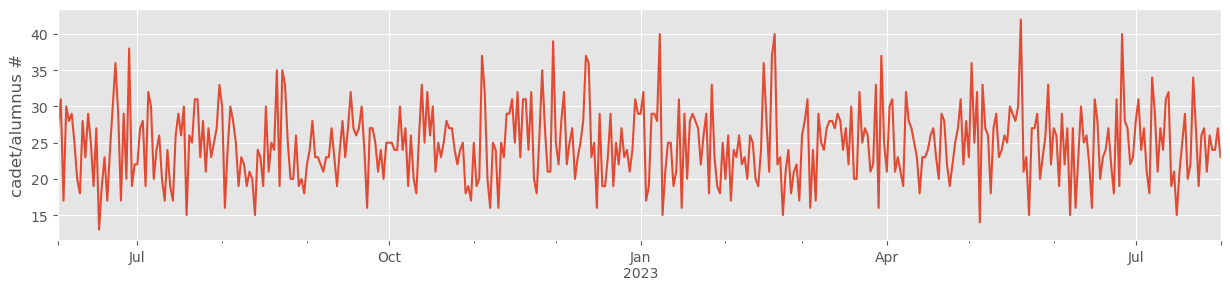

In [5]:
# plot the number of customers (cadet/alumnus) each day
plt.figure(figsize=(15,3))
df_sales_n_user=data.resample("D",on='Tanggal Transaksi')['NRT/Kode Pelaut'].nunique()
df_sales_n_user.plot(kind='line')
plt.xlabel('')
plt.ylabel('cadet/alumnus #')

The number of unique customers generally fluctuates between 15 and 40 daily. For a business, understanding the factors that lead to the higher end of this range could be critical for driving sales and customer engagement strategies.

Text(0, 0.5, 'Transactions (Rp Million)')

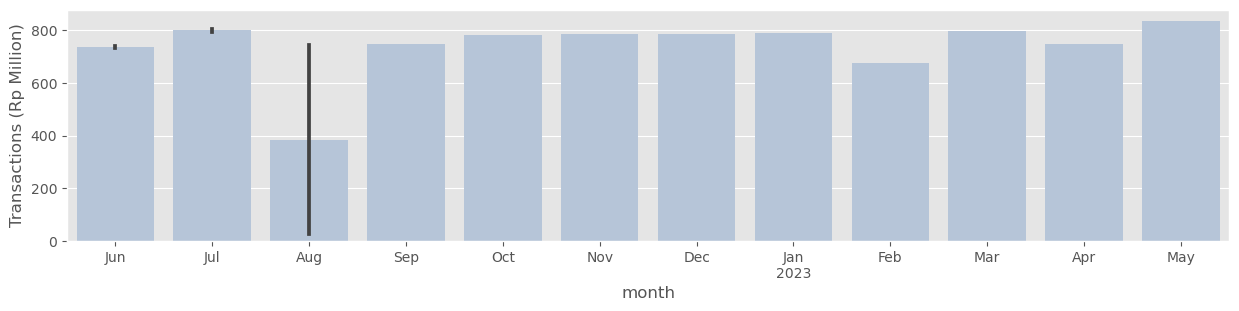

In [6]:
plt.figure(figsize=(15,3))
a=data.resample('M',on='Tanggal Transaksi')['Nominal Transaksi'].sum().to_frame()
a['month']=['Jun','Jul','Aug',"Sep", "Oct", "Nov", "Dec", "Jan\n2023", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]
a['Nominal Transaksi']=a['Nominal Transaksi']/1000000
sns.barplot(x='month',y='Nominal Transaksi',data=a,color="lightsteelblue")
plt.xlabel('month')
plt.ylabel('Transactions (Rp Million)')

The transactions peak in July, with the value reaching just under 800 million Rp.
There is a significant drop in transactions in August, where the value falls to around 200 million Rp.
After August, the transactions seem to recover and maintain a relatively stable range between approximately 600 million Rp and 800 million Rp from September to May of the following year, with minor fluctuations.

Text(0, 0.5, 'average cost spent for training each customer (Rp)')

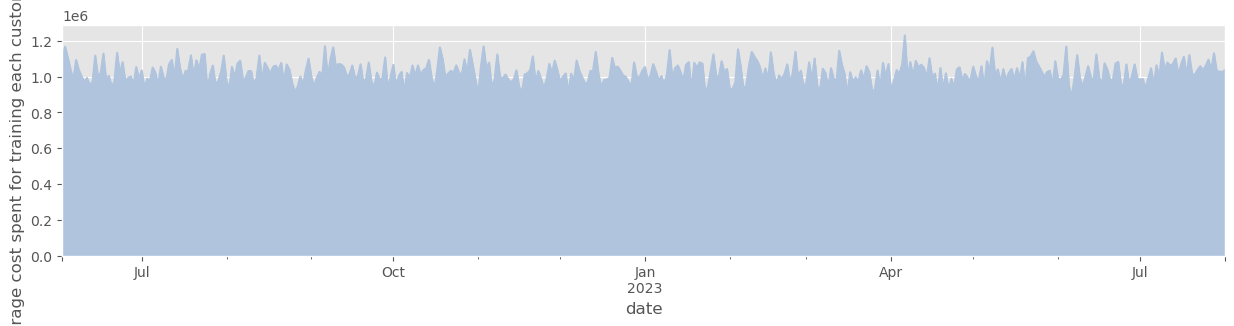

In [7]:
plt.figure(figsize=(15,3))
df_sales_p_day=data.resample('D',on='Tanggal Transaksi')['Nominal Transaksi'].sum()
df_sales_spent=df_sales_p_day/df_sales_n_user
df_sales_spent.plot(kind='area',color="lightsteelblue")
plt.xlabel('date')
plt.ylabel('average cost spent for training each customer (Rp)')

The average cost fluctuates frequently, with many peaks and valleys throughout the period.
There is no clear long-term upward or downward trend; instead, the costs seem to vary around a certain level.
The scale on the vertical axis goes up to Rp1.6 million, but the actual costs seem to stay well below this maximum value, suggesting that the average cost per customer for training is generally much lower than Rp1.6 million

In [8]:
# Convert 'Tanggal Lahir' and 'Tanggal Transaksi' to datetime
data['Tanggal Lahir'] = pd.to_datetime(data['Tanggal Lahir'])
data['Tanggal Transaksi'] = pd.to_datetime(data['Tanggal Transaksi'])

# Calculate age at the time of transaction
data['Age'] = data['Tanggal Transaksi'].dt.year - data['Tanggal Lahir'].dt.year
data['Age'] -= ((data['Tanggal Transaksi'].dt.month < data['Tanggal Lahir'].dt.month) | 
                ((data['Tanggal Transaksi'].dt.month == data['Tanggal Lahir'].dt.month) & 
                 (data['Tanggal Transaksi'].dt.day < data['Tanggal Lahir'].dt.day)))

### Generate ARFM Table

#### Age

Calculate the average age of each unique customer in the dataset by grouping the data by customer identifier and then computing the mean age within each group. 

In [9]:
# step 0 calculate "Age"
df_A = data.groupby('NRT/Kode Pelaut')['Age'].mean().reset_index().rename(columns={"Age":"Age"})
df_A

,NRT/Kode Pelaut,Age
0,2001825302,19.200000
1,2002405484,20.600000
2,2002626173,19.333333
3,2002627960,20.400000
4,2003193739,19.750000
...,...,...
2341,62011567027,30.333333
2342,62011567103,32.000000
2343,62011570004,31.000000
2344,62011571076,21.500000


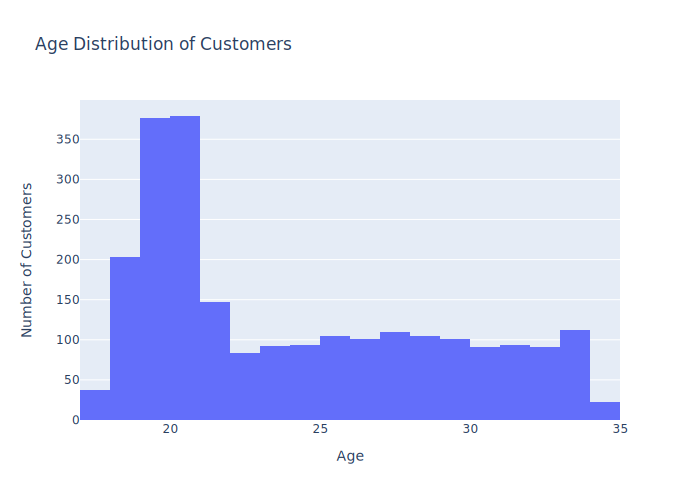

In [10]:
# Create a histogram to visualize the age distribution
fig = px.histogram(df_A, x='Age', nbins=20, title='Age Distribution of Customers')
fig.update_layout(xaxis_title='Age', yaxis_title='Number of Customers')
fig.show()

The majority of customers are cadets who are approximately 20 years old

#### Recency

Group the data by customer identifier ('NRT/Kode Pelaut'), calculates the minimum recency for each customer, and stores the result in a DataFrame (df_R) with columns for the customer identifier and their corresponding recency.

In [11]:
# step 1 calculate "Recency"
latest_date = data['Tanggal Transaksi'].max()
data['Duration to Latest Date'] = latest_date - data['Tanggal Transaksi']
data['Duration to Latest Date'] = pd.to_numeric(data['Duration to Latest Date'].dt.days, downcast='integer')
data['Recency'] = data['Duration to Latest Date']
df_R = data.groupby('NRT/Kode Pelaut')['Recency'].min().reset_index().rename(columns={"0":"Recency"})
df_R

,NRT/Kode Pelaut,Recency
0,2001825302,12
1,2002405484,141
2,2002626173,57
3,2002627960,14
4,2003193739,109
...,...,...
2341,62011567027,28
2342,62011567103,5
2343,62011570004,82
2344,62011571076,40


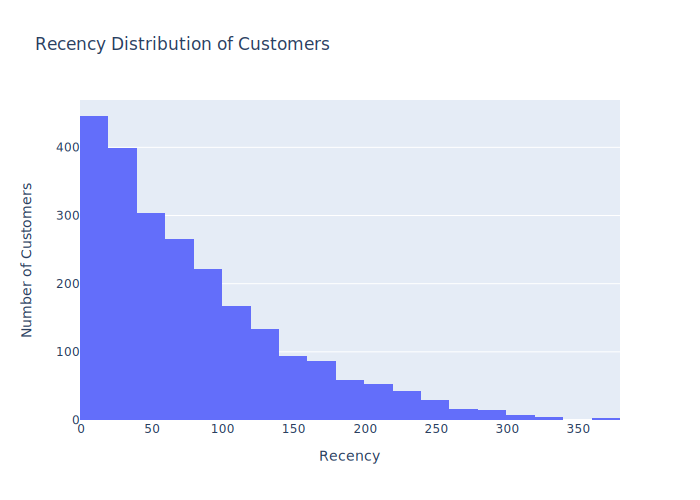

In [12]:
# Create a histogram to visualize the recency distribution
fig = px.histogram(df_R, x='Recency', nbins=20, title='Recency Distribution of Customers')
fig.update_layout(xaxis_title='Recency', yaxis_title='Number of Customers')
fig.show()

#### Frequency

Calculate the frequency of transactions for each unique customer. It groups the data by customer identifier ('NRT/Kode Pelaut') and counts the number of occurrences of 'Diklat' for each group, which likely represents the number of training sessions or courses attended by each customer. The result is stored in a DataFrame df_F with two columns: 'NRT/Kode Pelaut' and 'Frequency', where 'Frequency' represents the number of transactions (or training sessions attended) for each customer.

In [13]:
# step 2 calculate "Frequency"
df_F = data.groupby('NRT/Kode Pelaut')['Diklat'].count().reset_index().rename(columns={"Diklat":"Frequency"})
df_F

,NRT/Kode Pelaut,Frequency
0,2001825302,5
1,2002405484,5
2,2002626173,3
3,2002627960,5
4,2003193739,4
...,...,...
2341,62011567027,3
2342,62011567103,4
2343,62011570004,6
2344,62011571076,6


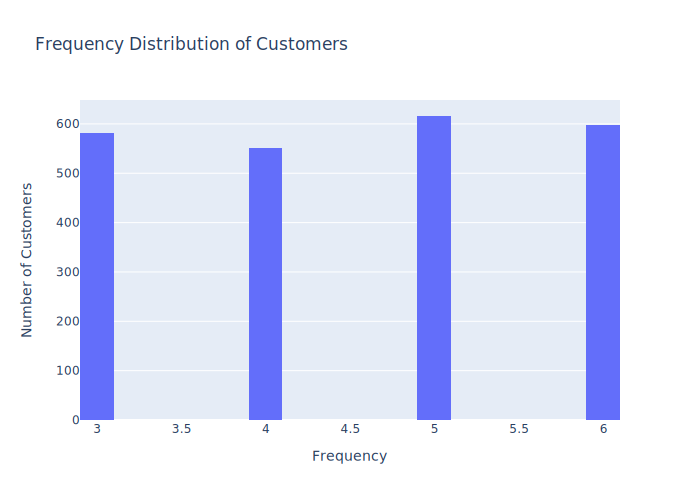

In [14]:
# Create a histogram to visualize the Frequency distribution
fig = px.histogram(df_F, x='Frequency', nbins=20, title='Frequency Distribution of Customers')
fig.update_layout(xaxis_title='Frequency', yaxis_title='Number of Customers')
fig.show()

#### Monetary

Calculates the monetary value of transactions for each unique customer. It groups the data by customer identifier ('NRT/Kode Pelaut') and sums the 'Nominal Transaksi' column for each group, which likely represents the total amount spent by each customer. The result is stored in a DataFrame df_M with two columns: 'NRT/Kode Pelaut' and 'Monetary', where 'Monetary' represents the total amount spent by each customer.

In [15]:
# step 3 calculate "Monetary"
df_M = data.groupby('NRT/Kode Pelaut')["Nominal Transaksi"].sum().reset_index().rename(columns={"Nominal Transaksi":"Monetary"})
df_M

,NRT/Kode Pelaut,Monetary
0,2001825302,4165000
1,2002405484,4735000
2,2002626173,2955000
3,2002627960,5315000
4,2003193739,3980000
...,...,...
2341,62011567027,3955000
2342,62011567103,4090000
2343,62011570004,5750000
2344,62011571076,6425000


#### ARFM

In [16]:
# Merge the "Age" and "Recency" tables
df_AR = pd.merge(df_A, df_R, on='NRT/Kode Pelaut') 

# Merge the (age, recency) table with the "Frequency" table
df_ARF = pd.merge(df_AR, df_F, on='NRT/Kode Pelaut') 

# Merge the (age, recency, frequency) table with the "Monetary" table
df_ARFM = pd.merge(df_ARF, df_M, on='NRT/Kode Pelaut')

In [17]:
df_ARFM

,NRT/Kode Pelaut,Age,Recency,Frequency,Monetary
0,2001825302,19.200000,12,5,4165000
1,2002405484,20.600000,141,5,4735000
2,2002626173,19.333333,57,3,2955000
3,2002627960,20.400000,14,5,5315000
4,2003193739,19.750000,109,4,3980000
...,...,...,...,...,...
2341,62011567027,30.333333,28,3,3955000
2342,62011567103,32.000000,5,4,4090000
2343,62011570004,31.000000,82,6,5750000
2344,62011571076,21.500000,40,6,6425000


In [18]:
# step 5 remove outliers before clustering
conditions=np.abs(stats.zscore(df_ARFM.loc[:,['Recency','Frequency','Monetary']]) < 3).all(axis=1)
df_ARFM2=df_ARFM.loc[conditions,:]

df_ARFM2

,NRT/Kode Pelaut,Age,Recency,Frequency,Monetary
0,2001825302,19.200000,12,5,4165000
1,2002405484,20.600000,141,5,4735000
2,2002626173,19.333333,57,3,2955000
3,2002627960,20.400000,14,5,5315000
4,2003193739,19.750000,109,4,3980000
...,...,...,...,...,...
2341,62011567027,30.333333,28,3,3955000
2342,62011567103,32.000000,5,4,4090000
2343,62011570004,31.000000,82,6,5750000
2344,62011571076,21.500000,40,6,6425000


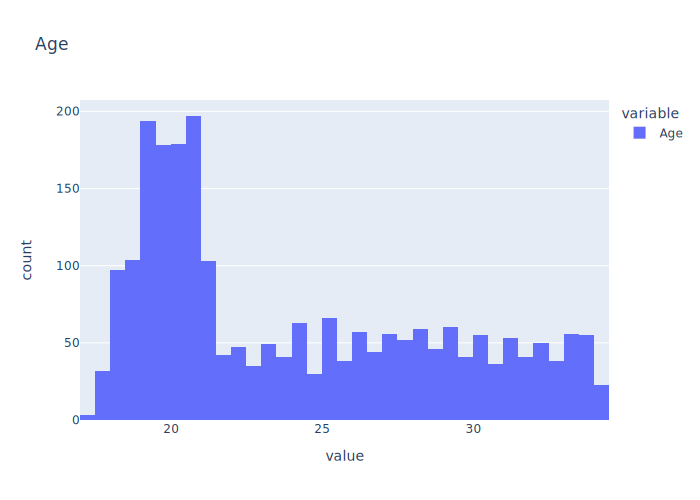

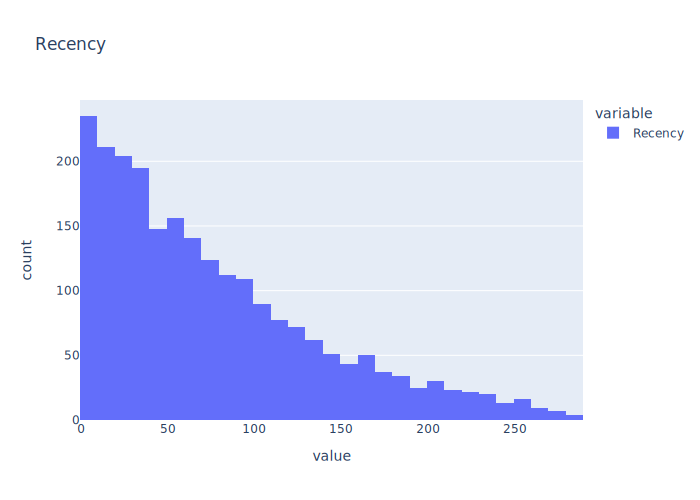

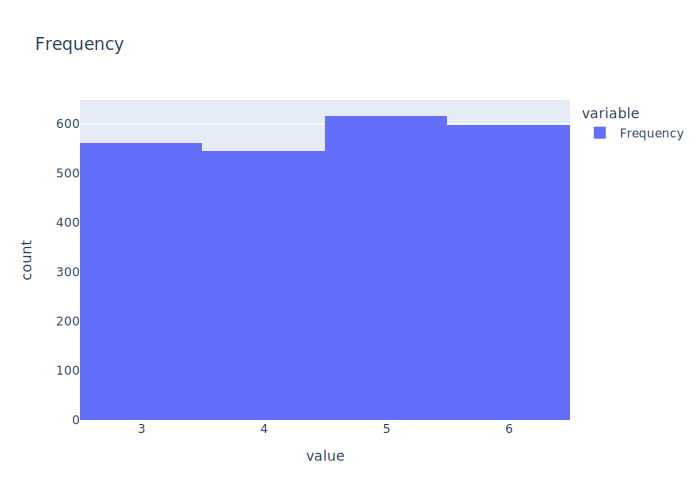

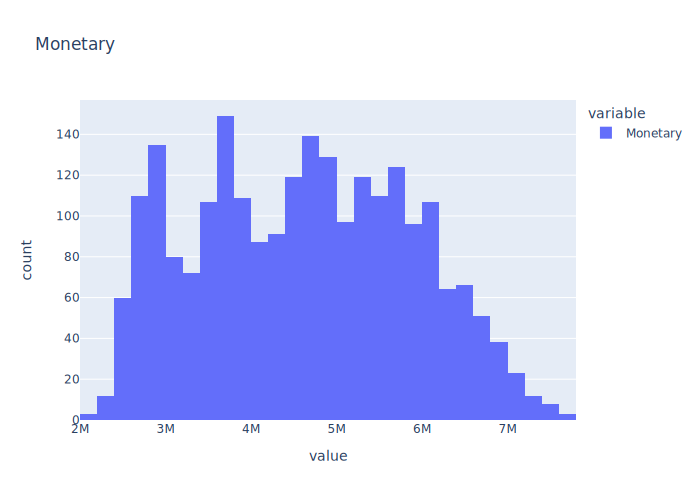

In [19]:
df_c = df_ARFM2

# Create  plot
fig = px.histogram(df_c,
  x = ["Age"],
  title = f"Age",
  )

# Plot
fig.show()
# Create  plot
fig = px.histogram(df_c,
  x = ["Recency"],
  title = f"Recency",
  )

# Plot
fig.show()

# Create  plot
fig = px.histogram(df_c,
  x = ["Frequency"],
  title = f"Frequency",
  )

# Plot
fig.show()

# Create  plot
fig = px.histogram(df_c,
  x = ["Monetary"],
  title = f"Monetary",
  )

# Plot
fig.show()

### Training

Kmeans from Scratch

In [20]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters  # number of clusters (user input)
        self.max_iterations = 100  # limit of centroid changes until iteration 100, then stop
        self.num_examples, self.num_features = X.shape  # number of features (ARFM --> 4 features)
        self.plot_figure = True  # plot figure

    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features))  # row, column full of zeros
        for k in range(self.K):  # iterations of
            centroid = X[np.random.choice(range(self.num_examples))]  # random centroids
            centroids[k] = centroid
        return centroids  # return random centroids

    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]  # set place for each cluster --> [[], [], []]  <-- example of 3 clusters
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))  # find euclidean distance
            )  # closest centroid using euclidean distance equation (calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters

    # new centroids # setup new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features))  # row, column full of zeros
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0)  # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    # euclid --> mathematical term to find straight line distance between points (in this case, points or one of the row values of ARFM with centroid point)

    # prediction # calculate euclidean distance of ARFM row closest to centroid
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples)  # row1 fillup with zeros
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    # plotting scatter plot
    def plot_fig(self, X, y):
        fig = px.scatter(X[:, 0], X[:, 1], color=y)
        fig.show()  # visualize

    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X)  # create random centroids
        for _ in range(self.max_iterations):  # iterations until max_iteration
            clusters = self.create_cluster(X, centroids)  # create cluster [[], [], []] --> example of 3 clusters
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)  # update new centroids
            diff = centroids - previous_centroids  # calculate difference # find centroid change
            # besides checking change in arfm point distance to centroid, kmeans also looks for centroid change
            if not diff.any():  # assume centroid does not change anymore
                break  # stop iteration function
        y_pred = self.predict_cluster(clusters, X)  # predict function

        return y_pred

In [21]:
df_ARFM3=df_ARFM2.drop(columns=['NRT/Kode Pelaut'])
X = np.array(df_ARFM3.astype(int))

In [22]:
model = KMeansClustering(X, num_clusters=3)
model.fit(X)

array([1., 1., 0., ..., 2., 2., 1.])

In [23]:
df_ARFM3['cluster'] = model.fit(X)
df_ARFM3 = pd.concat([df_ARFM2[["NRT/Kode Pelaut"]], df_ARFM3], axis=1)

df_ARFM3

,NRT/Kode Pelaut,Age,Recency,Frequency,Monetary,cluster
0,2001825302,19.200000,12,5,4165000,0.0
1,2002405484,20.600000,141,5,4735000,0.0
2,2002626173,19.333333,57,3,2955000,1.0
3,2002627960,20.400000,14,5,5315000,0.0
4,2003193739,19.750000,109,4,3980000,0.0
...,...,...,...,...,...,...
2341,62011567027,30.333333,28,3,3955000,0.0
2342,62011567103,32.000000,5,4,4090000,0.0
2343,62011570004,31.000000,82,6,5750000,2.0
2344,62011571076,21.500000,40,6,6425000,2.0


#### Davies Bouldin Score

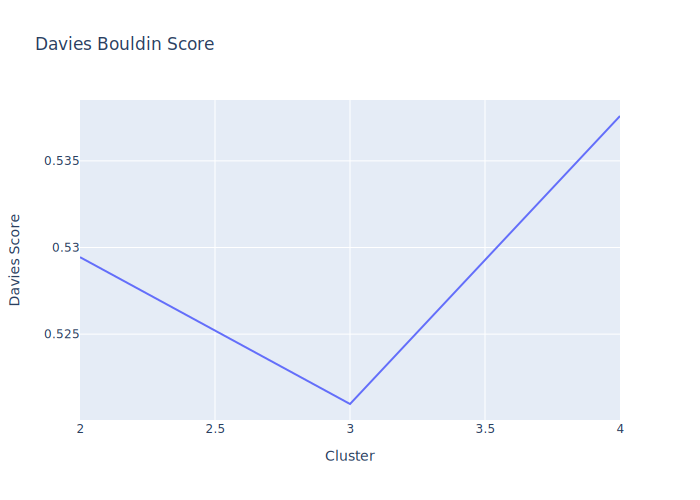

In [24]:
from sklearn.metrics import davies_bouldin_score

cluster_count = 5
davies_bouldin_scores = []
for k in range(2, cluster_count):
        km = KMeansClustering(X, num_clusters=k)
        labels = km.fit(X) # Labeling
        score = davies_bouldin_score(X, labels)
        davies_bouldin_scores.append(score)

df_score = pd.DataFrame(
        {"Cluster": range(2, cluster_count),
         "Davies Score": davies_bouldin_scores
         }
                        )
# Create scatter plot
fig = px.line(df_score,
                     x = "Cluster",
                     y = "Davies Score",
                     title = "Davies Bouldin Score")

# Plot
fig.show()

In [25]:
for i in range(len(davies_bouldin_scores)):
  print(f"Number of Cluster {i+2} --> {davies_bouldin_scores[i]}")

Number of Cluster 2 --> 0.529441832726189
Number of Cluster 3 --> 0.5209672310917056
Number of Cluster 4 --> 0.5375902868170457


From the results above, after cluster 3, the value of Davies–Bouldin Index (DBI) tends to not decrease anymore, indicating that having 3 clusters is the optimal choice. This can be observed from the pattern of decline starting from the calculation of DBI in cluster 2.

### **CLUSTER - 0**

In [26]:
# table cluster 0
df_cluster_0 = df_ARFM3[df_ARFM3['cluster']==0.0]
df_cluster_0

,NRT/Kode Pelaut,Age,Recency,Frequency,Monetary,cluster
0,2001825302,19.200000,12,5,4165000,0.0
1,2002405484,20.600000,141,5,4735000,0.0
3,2002627960,20.400000,14,5,5315000,0.0
4,2003193739,19.750000,109,4,3980000,0.0
5,2003279470,17.600000,89,5,4625000,0.0
...,...,...,...,...,...,...
2337,62011510200,33.166667,31,6,5170000,0.0
2338,62011532042,28.600000,27,5,4495000,0.0
2341,62011567027,30.333333,28,3,3955000,0.0
2342,62011567103,32.000000,5,4,4090000,0.0


In [27]:
df_cluster_0.describe()['Age'][['mean', 'min', 'max']].astype(int)

mean    24
min     17
max     34
Name: Age, dtype: int64

In [28]:
df_cluster_0.describe()['Recency'][['mean', 'min', 'max']].astype(int)

mean     73
min       0
max     274
Name: Recency, dtype: int64

In [29]:
df_cluster_0.describe()['Frequency'][['mean', 'min', 'max']].astype(int)

mean    4
min     3
max     6
Name: Frequency, dtype: int64

In [30]:
df_cluster_0.describe()['Monetary'][['mean', 'min', 'max']].astype(int)

mean    4683175
min     3940000
max     5400000
Name: Monetary, dtype: int64


**Cluster 0** comprises relatively young customers, with an average age of 23 years and an age range from 17 to 34 years. These customers have transacted recently, with an average recency of 95 days since their last transaction, ranging from 0 to 282 days. Their transaction frequency is moderate, averaging 3 transactions, with a range of 3 to 4 transactions. In terms of monetary value, the average transaction amount is approximately 3,195,127, with transaction values ranging from 2,095,000 to 3,930,000. Overall, Cluster 0 represents a segment of customers who are relatively young, transact moderately frequently, and spend moderately per transaction.

### **CLUSTER - 1**

In [31]:
# table cluster 1
df_cluster_1 = df_ARFM3[df_ARFM3['cluster']==1.0]
df_cluster_1

,NRT/Kode Pelaut,Age,Recency,Frequency,Monetary,cluster
2,2002626173,19.333333,57,3,2955000,1.0
8,2003770058,18.500000,2,4,3260000,1.0
13,2004552054,20.000000,33,3,2955000,1.0
16,2004971698,19.000000,151,3,3680000,1.0
18,2006010753,19.000000,161,4,3420000,1.0
...,...,...,...,...,...,...
2319,62011364277,23.500000,7,4,3440000,1.0
2322,62011389848,32.000000,215,3,3345000,1.0
2325,62011410709,33.000000,158,4,3270000,1.0
2332,62011450005,21.333333,213,3,2405000,1.0


In [32]:
df_cluster_1.describe()['Age'][['mean', 'min', 'max']].astype(int)

mean    23
min     17
max     34
Name: Age, dtype: int64

In [33]:
df_cluster_1.describe()['Recency'][['mean', 'min', 'max']].astype(int)

mean     95
min       0
max     282
Name: Recency, dtype: int64

In [34]:
df_cluster_1.describe()['Frequency'][['mean', 'min', 'max']].astype(int)

mean    3
min     3
max     4
Name: Frequency, dtype: int64

In [35]:
df_cluster_1.describe()['Monetary'][['mean', 'min', 'max']].astype(int)

mean    3195127
min     2095000
max     3930000
Name: Monetary, dtype: int64

**Cluster 1** consists of customers with an average age of 24 years, ranging from 17 to 34 years old. These customers have transacted relatively recently, with an average recency of 73 days since their last transaction, ranging from 0 to 274 days. They also exhibit a higher transaction frequency compared to other clusters, with an average of 4 transactions, ranging from 3 to 6 transactions. In terms of monetary value, the average transaction amount is approximately 4,683,175, with transaction values ranging from 3,940,000 to 5,400,000. Overall, Cluster 1 represents a segment of customers who are slightly older, transact more frequently, and spend more per transaction compared to other clusters.

### **CLUSTER - 2**

In [36]:
# table cluster 2
df_cluster_2 = df_ARFM3[df_ARFM3['cluster']==2.0]
df_cluster_2

,NRT/Kode Pelaut,Age,Recency,Frequency,Monetary,cluster
10,2004170573,20.000000,45,6,6545000,2.0
11,2004196596,18.666667,51,6,5700000,2.0
12,2004322996,20.500000,126,6,5460000,2.0
21,2007053774,20.166667,17,6,6385000,2.0
22,2007125991,17.833333,61,6,5660000,2.0
...,...,...,...,...,...,...
2335,62011472989,23.200000,43,5,5475000,2.0
2336,62011498948,28.166667,104,6,6100000,2.0
2339,62011537725,27.333333,102,6,6475000,2.0
2343,62011570004,31.000000,82,6,5750000,2.0


In [37]:
df_cluster_2.describe()['Age'][['mean', 'min', 'max']].astype(int)

mean    24
min     17
max     34
Name: Age, dtype: int64

In [38]:
df_cluster_2.describe()['Recency'][['mean', 'min', 'max']].astype(int)

mean     59
min       0
max     263
Name: Recency, dtype: int64

In [39]:
df_cluster_2.describe()['Frequency'][['mean', 'min', 'max']].astype(int)

mean    5
min     4
max     6
Name: Frequency, dtype: int64

In [40]:
df_cluster_2.describe()['Monetary'][['mean', 'min', 'max']].astype(int)

mean    6121692
min     5405000
max     7675000
Name: Monetary, dtype: int64

**Cluster 2** consists of customers with an average age of 24 years, ranging from 17 to 34 years old, similar to the other clusters. These customers have transacted recently, with an average recency of 59 days since their last transaction, ranging from 0 to 263 days. They have a high transaction frequency, with an average of 5 transactions, ranging from 4 to 6 transactions. In terms of monetary value, the average transaction amount is approximately 6,121,692, with transaction values ranging from 5,405,000 to 7,675,000. Overall, Cluster 2 represents a segment of customers who are similar in age to the other clusters but transact more frequently and spend more per transaction.

### Comparison Between Clusters

In [41]:
# Age
df_age_cluster = pd.concat([pd.DataFrame(df_cluster_0.describe()['Age'][['mean', 'min', 'max']].astype(int)),
           pd.DataFrame(df_cluster_1.describe()['Age'][['mean', 'min', 'max']].astype(int)),
           pd.DataFrame(df_cluster_2.describe()['Age'][['mean', 'min', 'max']].astype(int))], axis=1)
df_age_cluster.columns = ['Age-Cluster 0', 'Age-Cluster 1', 'Age-Cluster 2']
df_age_cluster

,Age-Cluster 0,Age-Cluster 1,Age-Cluster 2
mean,24,23,24
min,17,17,17
max,34,34,34


In [42]:
# Recency
df_age_recency= pd.concat([pd.DataFrame(df_cluster_0.describe()['Recency'][['mean', 'min', 'max']].astype(int)),
           pd.DataFrame(df_cluster_1.describe()['Recency'][['mean', 'min', 'max']].astype(int)),
           pd.DataFrame(df_cluster_2.describe()['Recency'][['mean', 'min', 'max']].astype(int))], axis=1)
df_age_recency.columns = ['Recency-Cluster 0', 'Recency-Cluster 1', 'Recency-Cluster 2']
df_age_recency

,Recency-Cluster 0,Recency-Cluster 1,Recency-Cluster 2
mean,73,95,59
min,0,0,0
max,274,282,263


In [43]:
# Frequency
df_age_frequency= pd.concat([pd.DataFrame(df_cluster_0.describe()['Frequency'][['mean', 'min', 'max']].astype(int)),
           pd.DataFrame(df_cluster_1.describe()['Frequency'][['mean', 'min', 'max']].astype(int)),
           pd.DataFrame(df_cluster_2.describe()['Frequency'][['mean', 'min', 'max']].astype(int))], axis=1)
df_age_frequency.columns = ['Frequency-Cluster 0', 'Frequency-Cluster 1', 'Frequency-Cluster 2']
df_age_frequency

,Frequency-Cluster 0,Frequency-Cluster 1,Frequency-Cluster 2
mean,4,3,5
min,3,3,4
max,6,4,6


In [44]:
# Monetary
df_age_monetary= pd.concat([pd.DataFrame(df_cluster_0.describe()['Monetary'][['mean', 'min', 'max']].astype(int)),
           pd.DataFrame(df_cluster_1.describe()['Monetary'][['mean', 'min', 'max']].astype(int)),
           pd.DataFrame(df_cluster_2.describe()['Monetary'][['mean', 'min', 'max']].astype(int))], axis=1)
df_age_monetary.columns = ['Monetary-Cluster 0', 'Monetary-Cluster 1', 'Monetary-Cluster 2']
df_age_monetary

,Monetary-Cluster 0,Monetary-Cluster 1,Monetary-Cluster 2
mean,4683175,3195127,6121692
min,3940000,2095000,5405000
max,5400000,3930000,7675000


* Customers are categorized into three groups: Cluster 0 (Platinum), Cluster 1 (Gold), and Cluster 2 (Silver).
* There is no significant age difference between the clusters.
* Cluster 0 has the shortest duration to the latest transaction, followed by Cluster 1 and then Cluster 2.
* Cluster 0 exhibits the highest transaction frequency, followed by Cluster 1 and then Cluster 2.
* Cluster 0 has the highest average transaction amount, followed by Cluster 1 and then Cluster 2.
* The trends in transaction values are consistent across average, minimum, and maximum values for each cluster.
* The most loyal customers are in Cluster 1, followed by Cluster 0, and then Cluster 2.
* Cluster 0 represents platinum customers with a monetary value of around 6 million and a frequency of 5-6.
* Cluster 1 consists of gold customers with a monetary value of around 4 million and a frequency of 4.
* Cluster 2 consists of silver customers with a monetary value of around 3 million and a frequency of 3.
* These insights can be used to tailor recommendations for contacting customers based on their respective clusters.

### Recommendations

Based on the clustering analysis results, the campus can consider the following recommendations:

* Personalized Communication: The campus can tailor its communication strategy based on the customer clusters. For example, they can send more frequent and targeted messages to the Platinum and Gold clusters (Cluster 0 and 1) as they have higher transaction frequencies and average transaction amounts.
* Loyalty Programs: The campus can develop loyalty programs to reward and retain the most loyal customers, i.e., those in Cluster 1, who have the shortest duration to the latest transaction and the highest transaction frequency.
* Training and Development: The campus can offer training and development opportunities to customers in Cluster 2 (Silver) to help them improve their skills and move up to higher-value clusters.
* Continuous Monitoring: The campus should continuously monitor and analyze customer data to track changes in clusters and adjust their strategies accordingly. This will help them maintain a strong relationship with their customers and ensure their long-term success.